In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
churn_data.shape

(10000, 14)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Bank clients')

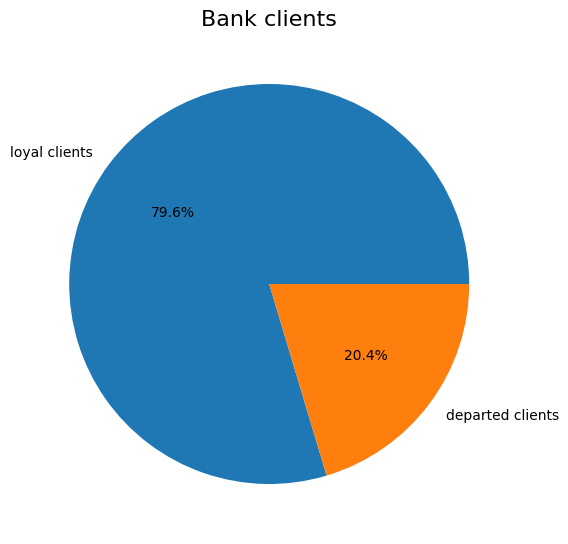

In [12]:

exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    exited,
    labels=['loyal clients', 'departed clients'],
    autopct='%.1f%%',
)

axes.set_title('Bank clients', fontsize=16)


из графика видно, что доля лояльных клиентов состовляет примерно 4/5 от общего числа

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

<AxesSubplot: xlabel='Balance'>

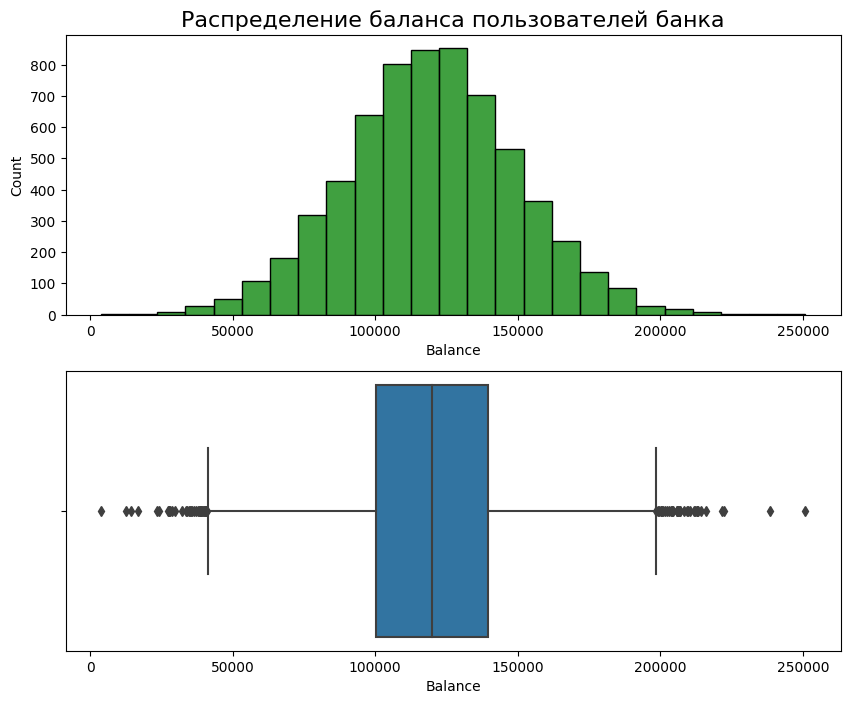

In [13]:
import seaborn as sns

mask = churn_data['Balance'] > 2500
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].set_title('Распределение баланса пользователей банка', fontsize=16)

sns.histplot(
    data=churn_data[mask],
    x='Balance',
    bins=25,
    color='green',
    ax=axes[0]
)

sns.boxplot(
    data=churn_data[mask],
    x='Balance',
    orient='h',
    width=0.9,
    ax=axes[1]
)

из графика видно, что медианный баланс пользователей банка состовляет примерно 125000. стоит отметить, что половина пользователей имеет баланс от 100000 до 140000, а график имеет нормальное распределение.      

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.



<AxesSubplot: title={'center': 'Распределение баланса пользователей банка'}, xlabel='Balance', ylabel='Exited'>

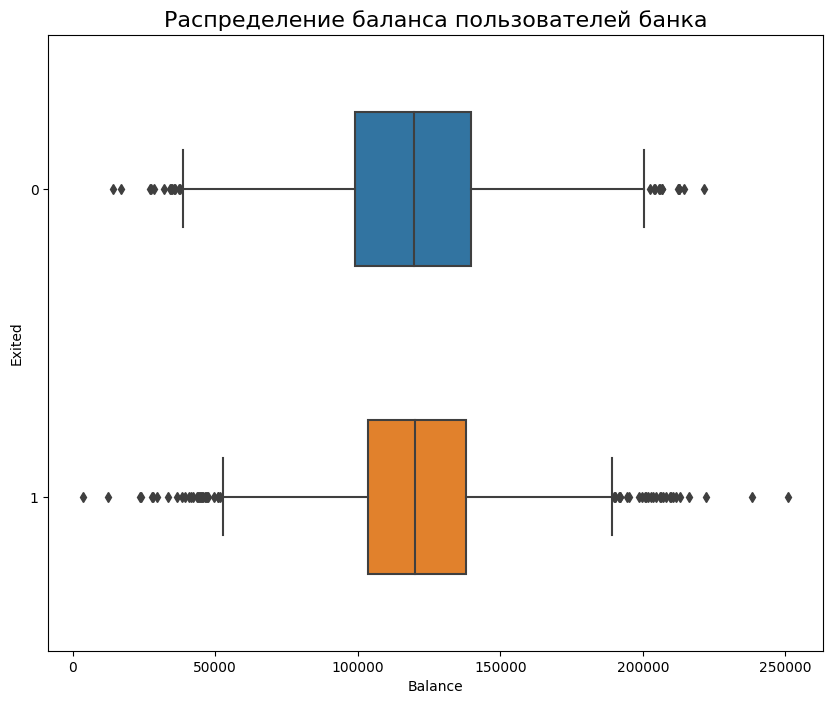

In [14]:
fig, axes = plt.subplots(figsize=(10, 8))
axes.set_title('Распределение баланса пользователей банка', fontsize=16)

sns.boxplot(
    data=churn_data[mask],
    x='Balance',
    y='Exited',
    orient='h',
    width=0.5
)

у лояльных клиентов наблюдаются несколько расширенные границы баланса по сравнению с нелояльными. также количество потенциальных выбросов в основном приходиться на ушедших клиентов. при этом медианные значения двух групп совпадают.


так как обе группы очень похожи, возможной причиной ухода может быть: банк с более выгодными условиями, кризис, передача наследства, крупная покупка/путешествие, жизнь на сбережения или отсутствие необходимости быть клиентом банка, после оказанных услуг(закрытие кредита).

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

<AxesSubplot: title={'center': 'Распределение возраста пользователей банка'}, xlabel='Age', ylabel='Exited'>

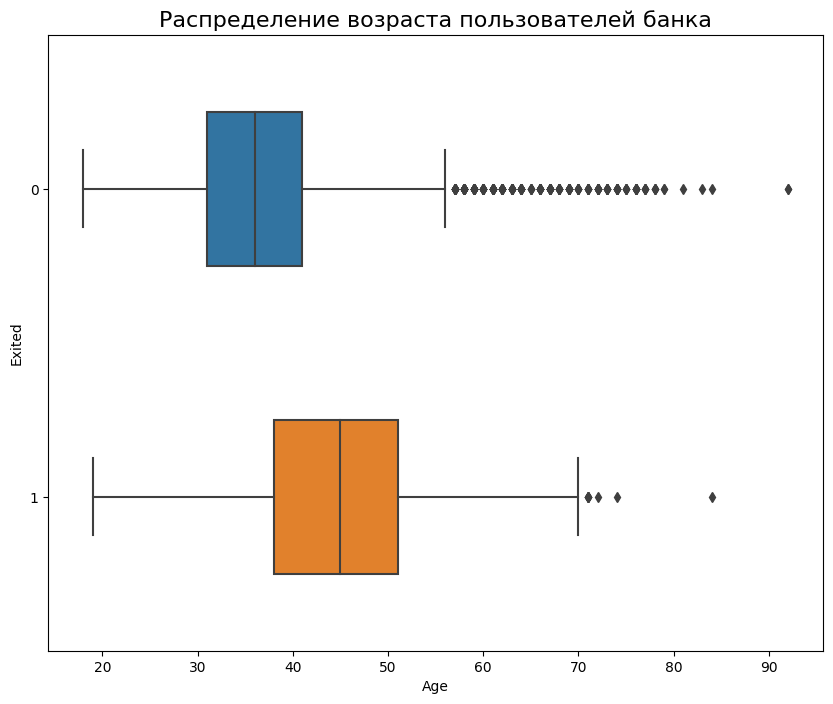

In [15]:
fig, axes = plt.subplots(figsize=(10, 8))
axes.set_title('Распределение возраста пользователей банка', fontsize=16)

sns.boxplot(
    data=churn_data[mask],
    x='Age',
    y='Exited',
    orient='h',
    width=0.5
)

наибольшее количество лояльных клиентов имеет возраст 30-40 лет, те наиболее трудоспособные слои населения. также среди лояльных клиентов наибольшее количество выбросов, возможно связанные с накоплениями.  
основная возрастная группа ушедших клиентов это 38-52 лет, и количество выбросов минимально. причиной ухода может быть, "желание пожить в свое удовольствие, попутешествовать" или отсутствие надобности в услугах банка(закрыли кредит).   
банку стоит уделить особое внимание к клиентам с возрастом 20-40 лет, так как в этот период люди чаще задумываются об откладывании сбережений и совершают наиболее значимые покупки(дом, машина и тд). закрывают же вклады чаще всего в 40-60. 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

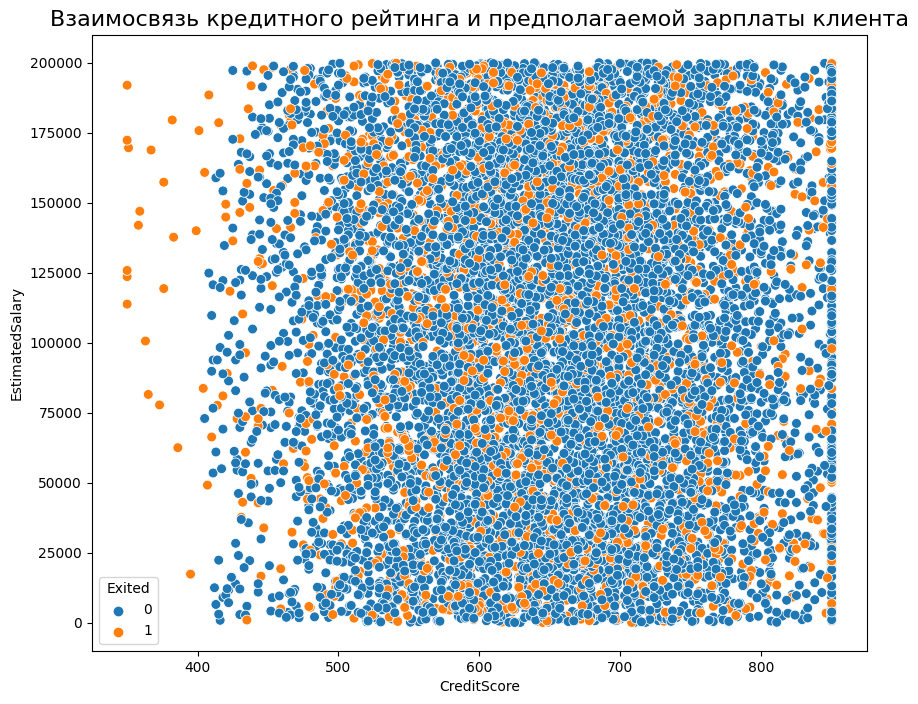

In [16]:

fig, axes = plt.subplots(figsize=(10, 8))
axes.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиента', fontsize=16)

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=50    
)


явной связи не наблюдается.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

<AxesSubplot: title={'center': 'Распределение ухода среди женщин и мужчин'}, xlabel='Gender'>

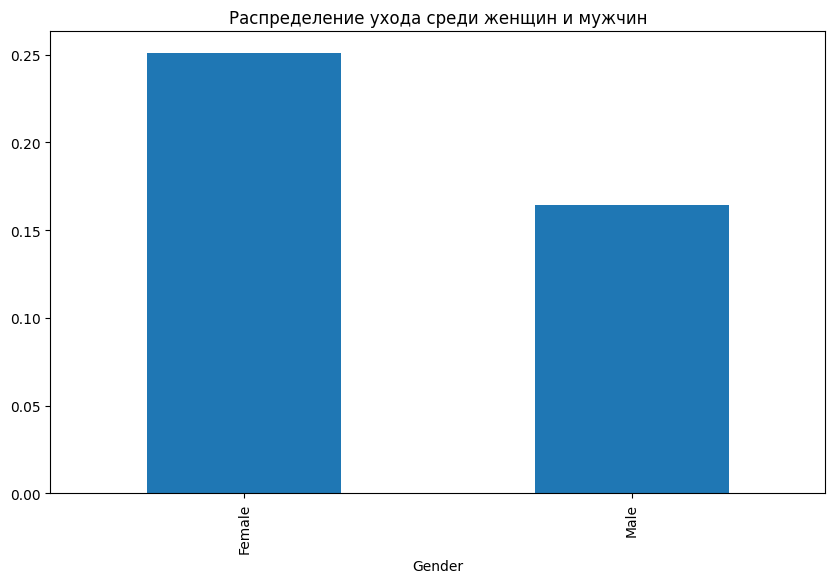

In [17]:
churn_data.groupby(['Gender'])['Exited'].mean().plot(
    kind='bar',
    figsize=(10, 6),
    title='Распределение ухода среди женщин и мужчин'
)

женщины уходят чаще, чем мужчины. уходит примерно каждая 4 женщина и каждый 6 мужчина.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [18]:
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()

fig = px.bar(
    bar_data,
    x='NumOfProducts',
    y='CustomerId',
    height=500,
    width=1000,
    color="Exited",
    title="Зависимость оттока клиентов от числа приобретённых у банка услуг."
)

fig.update_layout(xaxis_title="Количество услуг", yaxis_title="Количество клиентов")
fig.update_layout(barmode='stack')
fig.show()



подавляющие большенство ушедших клиентов имело 1 услугу, после оказания которой уходили. к примеру, закрыли кредит. 

банку стоит проявить активность в предоставлении 2 услуги клиентам, так как это сократит число ушедших клиентов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [19]:

bar_data=churn_data.groupby(['IsActiveMember'], as_index=False)['Exited'].sum()

fig = px.bar(
    bar_data,
    x='IsActiveMember',
    y='Exited',
    height=500,
    width=1000,
    title="Влияние статуса активного пользователя на отток клиентов."
)

fig.show()

среди неактивных клиентов наблюдается больший отток, практически в 2 раза. 
неактивным клиентам можно предложить более интересные условия по вкладам; инвистиции со стабильным доходом(к примеру, облигации), так как многие люди с недоверием относятся к инвистициям в целом, более высокий стабильный доход привлекателен; программы кешбека или систему скидок с партнерами банка; приложение по учету дохода.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [20]:
country = churn_data.groupby(['Geography'])['Exited'].mean()

#строим график
fig = px.choropleth(
    data_frame=country, 
    locations=country.index, 
    locationmode = "country names", 
    color=country, 
    range_color=[0, 1], 
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)

fig.show()

доля ушедших клиентов в Испании и в Франции примерно одинакова и в 2 раза ниже, чем в Германии(около 35%). основываясь на предыдущих графиках, можно предположить, что в Германии клиенты подходят более практично в отношении банковских услуг. возможно уровень жизни в Германии дороже по сравнению с Францией и Испанией, поэтому люди сразу избавляются от доп. расходов за обслуживание.    

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

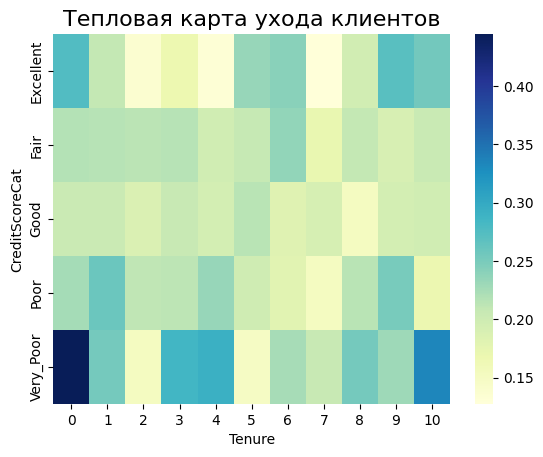

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)    

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ухода клиентов', fontsize=16);
heatmap.set_xlabel('Tenure');

больше всего уходит клиентов с рейтингом "Very_Poor" и временем сотрудничества 0;3;4;10 лет. второй группой с схожими результатами являются люди с рейтингом "Excellent". в целом, кредитный рейтинг и время обслуживания не влияют на уход клиентов.